In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [2]:
def fix_zip(series):
      return series.astype(str).str.replace('[^\w\s]', '').str.zfill(5)

In [3]:
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
#    plt.rcParams["figure.figsize"] = (15,15)
#    plt.figure(figsize=(15,15))
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()

In [10]:
train = pd.read_csv('train_df.csv')
test = pd.read_csv('test_df.csv')

train['Yr_Mo']= pd.to_datetime(train['Yr_Mo'])
test['Yr_Mo']= pd.to_datetime(test['Yr_Mo'])

test.head()
train.head()

Yr_Mo   01604   01702   01752        01851   01852    02109   02111  \
0 2014-01-01  1030.0  1644.0  1335.0   988.666667  1232.0  2780.75  3560.0   
1 2014-02-01  1034.0  1639.0  1339.0   976.000000  1233.5  2778.00  3561.0   
2 2014-03-01  1039.0  1634.0  1343.0   986.000000  1235.0  2785.00  3561.5   
3 2014-04-01  1043.0  1629.0  1347.0   996.000000  1236.0  2792.00  3562.0   
4 2014-05-01  1048.0  1625.0  1351.0  1005.000000  1238.0  2799.00  3563.0   

    02113   02114   02115   02116   02118   02120    02122   02124   02125  \
0  2201.0  2515.0  2473.0  2501.0  2756.0  3027.0  1398.00  1468.5  1856.0   
1  2208.0  2512.0  2476.0  2504.0  2759.0  3032.0  1412.75  1497.0  1859.0   
2  2215.0  2510.0  2478.0  2507.0  2763.0  3036.0  1427.50  1534.0  1862.0   
3  2222.0  2508.0  2481.0  2510.0  2767.0  3040.0  1442.25  1572.0  1866.0   
4  2228.0  2506.0  2485.0  2512.0  2770.0  3045.0  1457.00  1608.0  1869.0   

    02127        02130        02132   02134   02135   02138   02139   02140  \
0  2350.0  2137.916667  1576.333333  1944.0  1893.0  2233.0  2516.0  2034.0   
1  2357.0  2145.000000  1579.000000  1950.0  1900.0  2244.0  2517.0  2058.0   
2  2364.0  2154.000000  1591.000000  1955.0  1908.0  2255.0  2519.0  2082.0   
3  2372.0  2162.000000  1603.000000  1961.0  1916.0  2266.0  2521.0  2105.0   
4  2379.0  2171.000000  1615.000000  1966.0  1923.0  2276.0  2522.0  2128.0   

         02141   02143   02144   02148        02150   02151   02155   02171  \
0  2404.583333  2114.0  2199.0  1991.0  1633.000000  1575.0  2053.0  1854.0   
1  2404.000000  2114.0  2213.0  1982.0  1637.666667  1588.0  2053.0  1846.0   
2  2402.000000  2115.0  2226.0  1972.5  1642.333333  1601.0  2053.0  1839.0   
3  2400.000000  2115.0  2240.0  1963.0  1647.000000  1614.0  2053.0  1831.0   
4  2398.000000  2116.0  2253.0  1955.0  1653.000000  1626.0  2054.0  1826.0   

    02210   02215   02445   02446   02472   02474   02809   02840   02906  \
0  3368.0  2153.0  2229.0  2500.0  1749.0  1791.0  1497.0  1688.0  1318.0   
1  3377.5  2158.0  2240.0  2507.0  1772.0  1798.0  1503.5  1690.0  1319.0   
2  3387.0  2164.0  2251.0  2515.0  1796.0  1805.0  1510.0  1692.0  1320.0   
3  3396.0  2169.0  2262.0  2522.0  1819.0  1813.0  1516.5  1694.0  1322.0   
4  3403.0  2174.0  2272.0  2529.0  1841.0  1820.0  1523.0  1697.0  1323.0   

     03820        06033   06040   06460   06484   06492   06511   06605  \
0  1199.75  1440.833333  1085.0  1492.0  1669.0   987.0  1286.0  1155.0   
1  1202.00  1405.000000  1084.0  1496.0  1670.0   990.0  1294.0  1158.0   
2  1204.00  1420.000000  1084.0  1501.0  1670.0   994.0  1301.0  1161.0   
3  1206.00  1435.000000  1084.0  1505.0  1671.0   997.0  1309.0  1164.0   
4  1209.00  1450.000000  1084.0  1510.0  1672.0  1000.0  1316.0  1167.0   

    06705   06810   06830   06851   06854        06901        06902   06905  \
0  1013.0  1525.0  2565.0  1802.0  1545.0  2376.833333  2186.583333  2046.0   
1  1006.0  1529.0  2577.0  1811.0  1555.0  2389.000000  2184.000000  2042.0   
2   999.0  1533.5  2589.0  1821.0  1566.0  2408.000000  2180.000000  2038.0   
3   992.5  1538.0  2601.0  1830.0  1576.0  2427.000000  2176.000000  2035.0   
4   986.0  1543.0  2615.0  1839.0  1586.0  2443.000000  2172.000000  2032.0   

         07002        07013   07024   07030        07042        07047   07086  \
0  1162.000000  1528.000000  2127.0  2409.0  1534.333333  1923.000000  2117.0   
1  1171.333333  1543.333333  2137.0  2426.0  1540.000000  1921.333333  2140.0   
2  1180.666667  1558.666667  2146.0  2443.0  1547.000000  1919.666667  2163.0   
3  1190.000000  1574.000000  2156.0  2461.0  1553.000000  1918.000000  2186.0   
4  1199.000000  1588.000000  2165.0  2477.0  1560.000000  1918.000000  2208.0   

    07087   07093        07094   07302   07304        07306   07307   07450  \
0  1463.0  1465.0  2027.333333  2341.0  1213.0  1533.083333  1321.0  2142.0   
1  1472.0  1480.0  2028.000000  2351.0  1220.0  1533.000000  1325.0  2144.0   
2  148

In [14]:
train_df = pd.pivot_table(train,index=train.Yr_Mo)
test_df = pd.pivot_table(test,index=test.Yr_Mo)

#### Using VARMA for baseline 2021 predictions

In [ ]:
# var_actual=pd.read_csv(‘var_actual.csv’)
# var_pred=pd.read_csv(‘var_pred.csv’)
# var_actual.index=var_actual[‘Yr_Mo’]
# var_pred.index=var_pred[‘Unnamed: 0’]
# var_pred=var_pred.rename_axis(“Yr_Mo”)
# var_act_zip = var_actual[[‘11937’,‘90265’,‘94920’,‘33480’,‘91320’,‘94105’,‘10007’,‘10069’,‘94107’,‘94103’]]
# var_pred_zip = var_pred[[‘Pred11937’,‘Pred90265’,‘Pred94920’,‘Pred33480’,‘Pred91320’,‘Pred94105’,‘Pred10007’,‘Pred10069’,‘Pred94107’,‘Pred94103’]]

In [16]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(model_fit.y, steps=len(test))
    res=pd.DataFrame({**dict(zip(['Pred'+str(test.columns[i])for i in range(len(test.columns))],
                                 [[x[i] for x in yhat] for i in range(len(yhat[0]))])),
                      **test.rename(columns={col_:'Act'+str(col_) for col_ in test.columns}).
                      reset_index(drop=True).to_dict('series')})
    
   
    preds=pd.DataFrame.from_dict(dict(zip(['Pred'+str(test.columns[i])for i in range(len(test.columns))],
                                 [[x[i] for x in yhat] for i in range(len(yhat[0]))])))
    acts=test.rename(columns={col_:'Act'+str(col_) for col_ in test.columns})

    return res, preds, acts

# df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
# df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret, var_pred_df, var_act_df = VAR_model(train_df, test_df)
#show_graph(train_df, df_ret, "Vector Autoregression (VAR)")

C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


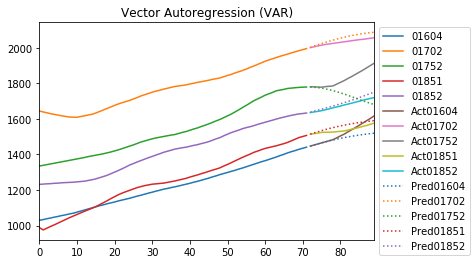

In [32]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
right_ind = 5
left_ind=0
left_train = train_df.iloc[:,left_ind:right_ind]
left_test = test_df.iloc[:,left_ind:right_ind]

def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(model_fit.y, steps=len(test))
    res=pd.DataFrame({**dict(zip(['Pred'+str(test.columns[i])for i in range(len(test.columns))],
                                 [[x[i] for x in yhat] for i in range(len(yhat[0]))])),
                      **test.rename(columns={col_:'Act'+str(col_) for col_ in test.columns}).to_dict('series')})

    return res

# df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
# df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VAR_model(left_train, left_test)
show_graph(left_train, df_ret, "Vector Autoregression (VAR)")

C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


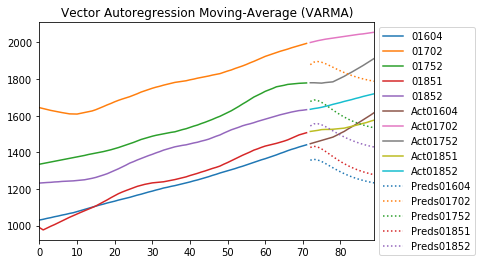

In [19]:
from statsmodels.tsa.statespace.varmax import VARMAX
right_ind = 5
left_ind=0
left_train = train_df.iloc[:,left_ind:right_ind]
left_test = test_df.iloc[:,left_ind:right_ind]

def VARMA_model(train,test):
    # fit model
    model = VARMAX(train, order=(1, 0))
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(steps=len(test))
    #yhat.reset_index(drop=True, inplace=True)
    preds=yhat.rename(columns={col_:'Preds'+str(col_) for col_ in yhat.columns})
    acts=test.rename(columns={col_:'Act'+str(col_) for col_ in test.columns})

    res = preds.merge(acts, left_index=True, right_index=True)
    
    return res, acts, preds

df_ret, var_act_zip, var_pred_zip = VARMA_model(left_train, left_test)
show_graph(left_train, df_ret, "Vector Autoregression Moving-Average (VARMA)")

In [17]:
var_pred_df.head()

Pred01604    Pred01702    Pred01752    Pred01851    Pred01852  \
0  1447.593902  2000.934434  1778.917928  1509.858828  1635.605486   
1  1453.371321  2007.314198  1777.981800  1509.554855  1638.038998   
2  1459.375368  2013.766840  1776.770214  1507.177661  1641.397610   
3  1464.970229  2019.387781  1774.124378  1500.981399  1644.450710   
4  1470.326812  2024.466514  1770.460284  1492.032607  1647.506313   

     Pred02109    Pred02111    Pred02113    Pred02114    Pred02115  \
0  3064.196140  3777.626369  2501.672522  2828.314079  2854.979974   
1  3048.326534  3746.593482  2489.922132  2812.468715  2840.152499   
2  3028.292196  3707.993392  2475.603029  2793.271859  2822.516174   
3  3002.417973  3660.560072  2457.673835  2768.138124  2798.939048   
4  2973.297366  3607.000278  2437.818478  2737.324581  2771.905920   

     Pred02116    Pred02118    Pred02120    Pred02122    Pred02124  \
0  2793.095864  3249.106229  3641.631665  2233.015793  2342.944939   
1  2780.137503  3232.284131  3629.886483  2245.648991  2351.248016   
2  2763.891416  3211.909186  3615.138999  2257.375389  2357.394952   
3  2742.911103  3184.803313  3597.050162  2268.259194  2365.049297   
4  2717.883622  3152.815854  3578.468644  2278.312959  2378.488404   

     Pred02125    Pred02127    Pred02130    Pred02132    Pred02134  \
0  2532.435425  2949.620456  2579.912325  2028.538125  2323.266545   
1  2529.807161  2950.415306  2574.578542  2031.483535  2319.458041   
2  2524.840972  2949.866641  2567.488979  2034.199277  2313.898446   
3  2514.812048  2948.093589  2559.295844  2035.553945  2306.596994   
4  2500.709909  2945.788238  2549.390422  2036.436400  2297.176408   

     Pred02135    Pred02138    Pred02139    Pred02140    Pred02141  \
0  2278.668544  2660.340541  2873.863258  2732.309686  2837.021588   
1  2275.307039  2655.262966  2865.612281  2719.769928  2827.208782   
2  2269.940129  2648.216991  2856.183807  2703.274421  2810.759908   
3  2262.063070  2637.002526  2844.327036  2679.737562  2791.332517   
4  2252.726965  2621.950704  2830.604564  2650.106566  2765.811530   

     Pred02143    Pred02144    Pred02148    Pred02150    Pred02151  \
0  2525.507158  2716.560010  2305.970809  2144.465703  2292.554739   
1  2520.646381  2708.382573  2297.885412  2137.615414  2287.351205   
2  2514.821487  2697.508607  2288.599560  2129.366154  2281.519017   
3  2507.769483  2684.036284  2277.262792  2119.545368  2274.846377   
4  2500.620654  2669.055508  2264.041865  2107.052719  2268.240888   

     Pred02155    Pred02171    Pred02210    Pred02215    Pred02445  \
0  2536.191906  2146.324946  3652.261970  2590.941155  2677.856611   
1  2532.958669  2143.145284  3624.347354  2585.210174  2676.493522   
2  2528.581117  2139.535722  3591.575103  2577.964782  2673.279848   
3  2522.833811  2135.680985  3549.690409  2567.009083  2668.003657   
4  2515.284534  2131.835355  3500.372760  2552.681929  2661.053720   

     Pred02446    Pred02472    Pred02474    Pred02809    Pred02840  \
0  2942.878840  2378.432593  2261.079779  1932.540524  2154.043183   
1  2940.975605  2376.505432  2260.002163  1943.421635  2161.958952   
2  2937.475598  2372.916166  2258.544952  1955.177714  2171.144746   
3  2930.979030  2366.412459  2256.511726  1967.626326  2181.105900   
4  2921.990755  2359.211670  2254.999451  1980.826610  2189.904584   

     Pred02906    Pred03820    Pred06033    Pred06040    Pred06460  \
0  1702.332051  1526.691240  1653.990960  1219.590526  1777.874282   
1  1704.902144  1528.008284  1654.502291  1224.011569  1785.312074   
2  1707.072830  1528.891235  1656.331705  1228.822103  1792.632787   
3  1708.730432  1528.456228  1658.802226  1234.430362  1798.585142   
4  1709.254881  1527.448810  1662.486047  1240.213480  1802.867434   

     Pred06484    Pred06492    Pred06511    Pred06605    Pred06705  \
0  1838.976185  1166.503087  1586.227262  1340.007771  1104.013510   
1  1839.258771  1167.233633  1591.616328  1343.898312  1121.328583   
2  183

In [18]:
var_pred_df.columns = [col.replace('Pred', '') for col in var_pred_df.columns]
var_act_df.columns = [col.replace('Act', '') for col in var_act_df.columns]

var_pred_df.head()
var_act_df.head()

01604   01702   01752   01851   01852   02109   02111   02113  \
Yr_Mo                                                                        
2020-01-01  1447.0  2000.0  1780.0  1514.0  1635.0  3069.0  3788.0  2505.0   
2020-02-01  1453.0  2005.0  1780.0  1517.0  1639.0  3052.0  3757.0  2488.0   
2020-03-01  1459.0  2010.0  1779.0  1520.0  1642.0  3035.0  3726.0  2472.0   
2020-04-01  1465.0  2014.0  1778.0  1524.0  1646.0  3018.0  3695.0  2455.0   
2020-05-01  1471.0  2018.0  1781.0  1525.0  1651.0  2993.0  3653.0  2431.0   

             02114   02115   02116   02118   02120   02122   02124   02125  \
Yr_Mo                                                                        
2020-01-01  2833.0  2859.0  2798.0  3255.0  3645.0  2233.0  2344.0  2536.0   
2020-02-01  2813.0  2840.0  2785.0  3232.0  3627.0  2246.0  2349.0  2533.0   
2020-03-01  2792.0  2822.0  2772.0  3210.0  3608.0  2259.0  2353.0  2529.0   
2020-04-01  2771.0  2803.0  2759.0  3188.0  3589.0  2272.0  2358.0  2526.0   
2020-05-01  2740.0  2780.0  2740.0  3156.0  3573.0  2288.0  2356.0  2514.0   

             02127   02130   02132   02134   02135   02138   02139   02140  \
Yr_Mo                                                                        
2020-01-01  2951.0  2580.0  2030.0  2325.0  2281.0  2663.0  2876.0  2738.0   
2020-02-01  2945.0  2575.0  2035.0  2319.0  2275.0  2653.0  2863.0  2725.0   
2020-03-01  2940.0  2567.0  2036.0  2312.0  2269.0  2644.0  2851.0  2711.0   
2020-04-01  2934.0  2560.0  2038.0  2305.0  2263.0  2634.0  2838.0  2698.0   
2020-05-01  2926.0  2552.0  2040.0  2294.0  2252.0  2613.0  2815.0  2673.0   

             02141   02143   02144   02148   02150   02151   02155   02171  \
Yr_Mo                                                                        
2020-01-01  2836.0  2526.0  2720.0  2309.0  2146.0  2294.0  2538.0  2146.0   
2020-02-01  2830.0  2515.0  2710.0  2303.0  2141.0  2287.0  2533.0  2141.0   
2020-03-01  2811.0  2504.0  2700.0  2297.0  2135.0  2281.0  2528.0  2137.0   
2020-04-01  2792.0  2494.0  2690.0  2291.0  2129.0  2274.0  2523.0  2132.0   
2020-05-01  2773.0  2478.0  2675.0  2280.0  2121.0  2266.0  2514.0  2127.0   

             02210   02215   02445   02446   02472   02474   02809   02840  \
Yr_Mo                                                                        
2020-01-01  3659.0  2593.0  2680.0  2946.0  2382.0  2261.0  1930.0  2152.0   
2020-02-01  3628.0  2584.0  2672.0  2940.0  2378.0  2258.0  1937.0  2164.0   
2020-03-01  3596.0  2575.0  2665.0  2934.0  2373.0  2256.0  1944.0  2176.0   
2020-04-01  3564.0  2566.0  2657.0  2928.0  2369.0  2254.0  1951.0  2188.0   
2020-05-01  3519.0  2551.0  2644.0  2908.0  2358.0  2252.0  1950.0  2206.0   

             02906   03820   06033   06040   06460   06484   06492   06511  \
Yr_Mo                                                                        
2020-01-01  1704.0  1528.0  1653.0  1218.0  1778.0  1839.0  1168.0  1585.0   
2020-02-01  1711.0  1529.0  1651.0  1222.0  1788.0  1844.0  1173.0  1589.0   
2020-03-01  1719.0  1531.0  1655.0  1227.0  1798.0  1849.0  1178.0  1593.0   
2020-04-01  1726.0  1533.0  1659.0  1231.0  1808.0  1855.0  1182.0  1597.0   
2020-05-01  1737.0  1536.0  1663.0  1238.0  1820.0  1861.0  1187.0  1600.0   

             06605   06705   06810   06830   06851   06854   06901   06902  \
Yr_Mo                                                                        
2020-01-01  1338.0  1100.0  1749.0  3284.0  2028.0  1858.0  2479.0  2291.0   
2020-02-01  1340.0  1111.0  1751.0  3298.0  2037.0  1866.0  2468.0  2290.0   
2020-03-01  1343.0  1121.0  1753.0  3312.0  2046.0  1874.0  2457.0  2291.0   
2020-04-01  1345.0  1132.0  1755.0  3326.0  2054.0  1882.0  2446.0  2293.0   
2020-05-01  1351.0  1139.0  1760.0  3347.0  2062.0  1889.0  2442.0  2294.0   

             06905   07002   07013   07024   07030   07042   07047   07086  \
Yr_Mo                                                                        
2020-01-01  2214.0  1593.0  

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

var_scores_df=pd.DataFrame(columns=['ZIP','MSE','RMSE','R2'])
for zip_ in var_act_df.columns:
    print()
    var_scores_df=var_scores_df.append({'ZIP':zip_,
                                'MSE':mean_squared_error(var_act_df[zip_],var_pred_df[zip_]),
                                'RMSE':np.sqrt(mean_squared_error(var_act_df[zip_],var_pred_df[zip_])),
                                'R2':r2_score(var_act_df[zip_],var_pred_df[zip_])},ignore_index=True)

var_scores_df.head()

In [ ]:
var_scores_df[‘%’]=np.abs(var_scores_df['Pred']/sarimax_pa_df['Act']-1)

In [33]:

var_pred_df.to_csv('var_pred_df.csv')
var_act_df.to_csv('var_act_df.csv')

var_scores_df.sort_values(by='R2',ascending=False)
var_scores_df.to_csv('var_scores_df.csv')